### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [64]:
# write your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs

### Getting 10 days weather forecasts of Benguerir city and Tanger City:

In [65]:
id_Tanger = "701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c"
id_Benguerir = "f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111"

In [66]:
Benguerir=requests.get("https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111")

In [68]:
Forcast_content = bs(Benguerir.content, 'lxml')
type(Forcast_content)

bs4.BeautifulSoup

In [69]:
Forcast_Benguerir = Forcast_content.find('div', id = "WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
Forcast_Benguerir_summaries = Forcast_Benguerir.find_all('summary')

In [84]:
def get_all_info(summary):
    df = [] 
    a = summary.find('h3')
    if  a != None:
        if a.get_text() not in df:
             df.append(a.get_text())
                
    for i in summary.find('div').find_all('div'):
        c = i.find_all('span')
        for span in c:
            df.append(span.get_text())
            
        break
    return df

In [85]:
df = [get_all_info(Forcast_Benguerir_summaries[b]) for b in range(1,15)]
df

[['dim. 18', '22°', '/8°', '8°', 'Ensoleillé', '14%', 'SE 11 km/h'],
 ['lun. 19', '23°', '/7°', '7°', 'Plutôt ensoleillé', '8%', 'E 12 km/h'],
 ['mar. 20', '22°', '/7°', '7°', 'Peu nuageux', '8%', 'SSO 10 km/h'],
 ['mer. 21', '21°', '/7°', '7°', 'Ensoleillé', '8%', 'ENE 13 km/h'],
 ['jeu. 22', '22°', '/6°', '6°', 'Ensoleillé', '10%', 'ENE 12 km/h'],
 ['ven. 23', '21°', '/6°', '6°', 'Ensoleillé', '8%', 'S 12 km/h'],
 ['sam. 24', '22°', '/6°', '6°', 'Ensoleillé', '7%', 'S 12 km/h'],
 ['dim. 25', '21°', '/7°', '7°', 'Plutôt ensoleillé', '5%', 'S 13 km/h'],
 ['lun. 26', '21°', '/8°', '8°', 'Plutôt ensoleillé', '15%', 'S 17 km/h'],
 ['mar. 27', '20°', '/8°', '8°', 'Peu nuageux', '8%', 'SSE 16 km/h'],
 ['mer. 28', '20°', '/8°', '8°', 'Peu nuageux', '5%', 'S 14 km/h'],
 ['jeu. 29', '20°', '/8°', '8°', 'Très nuageux', '9%', 'S 14 km/h'],
 ['ven. 30', '20°', '/9°', '9°', 'Peu nuageux', '9%', 'SSO 15 km/h'],
 ['sam. 31', '21°', '/9°', '9°', 'Peu nuageux', '2%', 'SSO 16 km/h']]

In [88]:
Tanger = requests.get("https://weather.com/fr-MA/temps/10jours/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c")

In [89]:
Forcast_content = bs(Tanger.content, 'lxml')
type(Forcast_content)

bs4.BeautifulSoup

In [90]:
Forcast_Tanger = Forcast_content.find('div', id = "WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
Forcast_Tanger_summaries = Forcast_Tanger.find_all('summary')

In [91]:
df_1 = [get_all_info(Forcast_Tanger_summaries[b]) for b in range(1,15)]
df_1

[['dim. 18', '20°', '/14°', '14°', 'Peu nuageux', '14%', 'E 22 km/h'],
 ['lun. 19', '21°', '/13°', '13°', 'Plutôt ensoleillé', '14%', 'E 16 km/h'],
 ['mar. 20',
  '21°',
  '/15°',
  '15°',
  "Averses dans l'après-midi",
  '43%',
  'SE 16 km/h'],
 ['mer. 21', '20°', '/13°', '13°', 'Peu nuageux', '17%', 'SO 11 km/h'],
 ['jeu. 22',
  '19°',
  '/12°',
  '12°',
  "Brouillard dans la matinée / Soleil dans l'après-midi",
  '12%',
  'N 8 km/h'],
 ['ven. 23', '19°', '/12°', '12°', 'Peu nuageux', '12%', 'SO 8 km/h'],
 ['sam. 24',
  '19°',
  '/13°',
  '13°',
  "Averses dans l'après-midi",
  '42%',
  'SO 9 km/h'],
 ['dim. 25', '19°', '/13°', '13°', 'Averses', '52%', 'ESE 12 km/h'],
 ['lun. 26',
  '19°',
  '/14°',
  '14°',
  'Averses dans la matinée',
  '32%',
  'ESE 18 km/h'],
 ['mar. 27',
  '18°',
  '/14°',
  '14°',
  "Averses dans l'après-midi",
  '30%',
  'ESE 19 km/h'],
 ['mer. 28', '18°', '/14°', '14°', 'Averses', '40%', 'ESE 19 km/h'],
 ['jeu. 29',
  '18°',
  '/14°',
  '14°',
  'Averses dans

### Storing data sets into Pandas DataFrame:

In [93]:
columns = ['Day', 'Max_Temperature', 'Min_Temperature1', 
           'Min_Temperature', 'State', 'Percentage_Value', 'Wind_Speed']
Data_of_Benguerir = pd.DataFrame(data=df, columns = columns)
Data_of_Benguerir

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,22°,/8°,8°,Ensoleillé,14%,SE 11 km/h
1,lun. 19,23°,/7°,7°,Plutôt ensoleillé,8%,E 12 km/h
2,mar. 20,22°,/7°,7°,Peu nuageux,8%,SSO 10 km/h
3,mer. 21,21°,/7°,7°,Ensoleillé,8%,ENE 13 km/h
4,jeu. 22,22°,/6°,6°,Ensoleillé,10%,ENE 12 km/h
5,ven. 23,21°,/6°,6°,Ensoleillé,8%,S 12 km/h
6,sam. 24,22°,/6°,6°,Ensoleillé,7%,S 12 km/h
7,dim. 25,21°,/7°,7°,Plutôt ensoleillé,5%,S 13 km/h
8,lun. 26,21°,/8°,8°,Plutôt ensoleillé,15%,S 17 km/h
9,mar. 27,20°,/8°,8°,Peu nuageux,8%,SSE 16 km/h


In [94]:
Tanger_data = pd.DataFrame(data=df_1, columns = columns)
Tanger_data 

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,20°,/14°,14°,Peu nuageux,14%,E 22 km/h
1,lun. 19,21°,/13°,13°,Plutôt ensoleillé,14%,E 16 km/h
2,mar. 20,21°,/15°,15°,Averses dans l'après-midi,43%,SE 16 km/h
3,mer. 21,20°,/13°,13°,Peu nuageux,17%,SO 11 km/h
4,jeu. 22,19°,/12°,12°,Brouillard dans la matinée / Soleil dans l'apr...,12%,N 8 km/h
5,ven. 23,19°,/12°,12°,Peu nuageux,12%,SO 8 km/h
6,sam. 24,19°,/13°,13°,Averses dans l'après-midi,42%,SO 9 km/h
7,dim. 25,19°,/13°,13°,Averses,52%,ESE 12 km/h
8,lun. 26,19°,/14°,14°,Averses dans la matinée,32%,ESE 18 km/h
9,mar. 27,18°,/14°,14°,Averses dans l'après-midi,30%,ESE 19 km/h


### Ploting the raining days of the two cities:

In [102]:
L = []
for i in range(len(Tanger_data["Percentage_Value"])):
    L.append(Tanger_data["Percentage_Value"][i])
    
new_L = []
for i in L:
    new_L.append(i.replace('%', ''))
    
    
T = []
for i in range(len(new_L)):
    T.append(int(new_L[i]))



In [ ]:
Tanger_data.insert(loc = 5,
          column='Rainning possibility (%)',
          value = T)

In [101]:
Tanger_data

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,Rainning possibility (%),State,Percentage_Value,Wind_Speed
0,dim. 18,20°,/14°,14°,14,Peu nuageux,14%,E 22 km/h
1,lun. 19,21°,/13°,13°,14,Plutôt ensoleillé,14%,E 16 km/h
2,mar. 20,21°,/15°,15°,43,Averses dans l'après-midi,43%,SE 16 km/h
3,mer. 21,20°,/13°,13°,17,Peu nuageux,17%,SO 11 km/h
4,jeu. 22,19°,/12°,12°,12,Brouillard dans la matinée / Soleil dans l'apr...,12%,N 8 km/h
5,ven. 23,19°,/12°,12°,12,Peu nuageux,12%,SO 8 km/h
6,sam. 24,19°,/13°,13°,42,Averses dans l'après-midi,42%,SO 9 km/h
7,dim. 25,19°,/13°,13°,52,Averses,52%,ESE 12 km/h
8,lun. 26,19°,/14°,14°,32,Averses dans la matinée,32%,ESE 18 km/h
9,mar. 27,18°,/14°,14°,30,Averses dans l'après-midi,30%,ESE 19 km/h


In [109]:
Rainy_days_tanger = Tanger_data.loc[Tanger_data["Rainning possibility (%)"] >= 10]
Rainy_days_tanger 


,Day,Max_Temperature,Min_Temperature1,Min_Temperature,Rainning possibility (%),State,Percentage_Value,Wind_Speed
0,dim. 18,20°,/14°,14°,14,Peu nuageux,14%,E 22 km/h
1,lun. 19,21°,/13°,13°,14,Plutôt ensoleillé,14%,E 16 km/h
2,mar. 20,21°,/15°,15°,43,Averses dans l'après-midi,43%,SE 16 km/h
3,mer. 21,20°,/13°,13°,17,Peu nuageux,17%,SO 11 km/h
4,jeu. 22,19°,/12°,12°,12,Brouillard dans la matinée / Soleil dans l'apr...,12%,N 8 km/h
5,ven. 23,19°,/12°,12°,12,Peu nuageux,12%,SO 8 km/h
6,sam. 24,19°,/13°,13°,42,Averses dans l'après-midi,42%,SO 9 km/h
7,dim. 25,19°,/13°,13°,52,Averses,52%,ESE 12 km/h
8,lun. 26,19°,/14°,14°,32,Averses dans la matinée,32%,ESE 18 km/h
9,mar. 27,18°,/14°,14°,30,Averses dans l'après-midi,30%,ESE 19 km/h


In [106]:
#Same thing for Bengurir city 
L1 = []
for i in range(len(Data_of_Benguerir["Percentage_Value"])):
    L1.append(Data_of_Benguerir["Percentage_Value"][i])
    
new_L1 = []
for i in L1:
    new_L1.append(i.replace('%', ''))
    
B = []
for i in range(len(new_L1)):
    B.append(int(new_L1[i]))
    
Data_of_Benguerir.insert(loc = 5,
          column='Rainning possibility (%)',
          value = B)

In [107]:
Data_of_Benguerir

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,State,Rainning possibility (%),Percentage_Value,Wind_Speed
0,dim. 18,22°,/8°,8°,Ensoleillé,14,14%,SE 11 km/h
1,lun. 19,23°,/7°,7°,Plutôt ensoleillé,8,8%,E 12 km/h
2,mar. 20,22°,/7°,7°,Peu nuageux,8,8%,SSO 10 km/h
3,mer. 21,21°,/7°,7°,Ensoleillé,8,8%,ENE 13 km/h
4,jeu. 22,22°,/6°,6°,Ensoleillé,10,10%,ENE 12 km/h
5,ven. 23,21°,/6°,6°,Ensoleillé,8,8%,S 12 km/h
6,sam. 24,22°,/6°,6°,Ensoleillé,7,7%,S 12 km/h
7,dim. 25,21°,/7°,7°,Plutôt ensoleillé,5,5%,S 13 km/h
8,lun. 26,21°,/8°,8°,Plutôt ensoleillé,15,15%,S 17 km/h
9,mar. 27,20°,/8°,8°,Peu nuageux,8,8%,SSE 16 km/h


In [120]:
Rainy_days_Benguerir = Tanger_data.loc[Data_of_Benguerir["Rainning possibility (%)"] >= 10]
Rainy_days_Benguerir

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,Rainning possibility (%),State,Percentage_Value,Wind_Speed
0,dim. 18,20°,/14°,14°,14,Peu nuageux,14%,E 22 km/h
4,jeu. 22,19°,/12°,12°,12,Brouillard dans la matinée / Soleil dans l'apr...,12%,N 8 km/h
8,lun. 26,19°,/14°,14°,32,Averses dans la matinée,32%,ESE 18 km/h


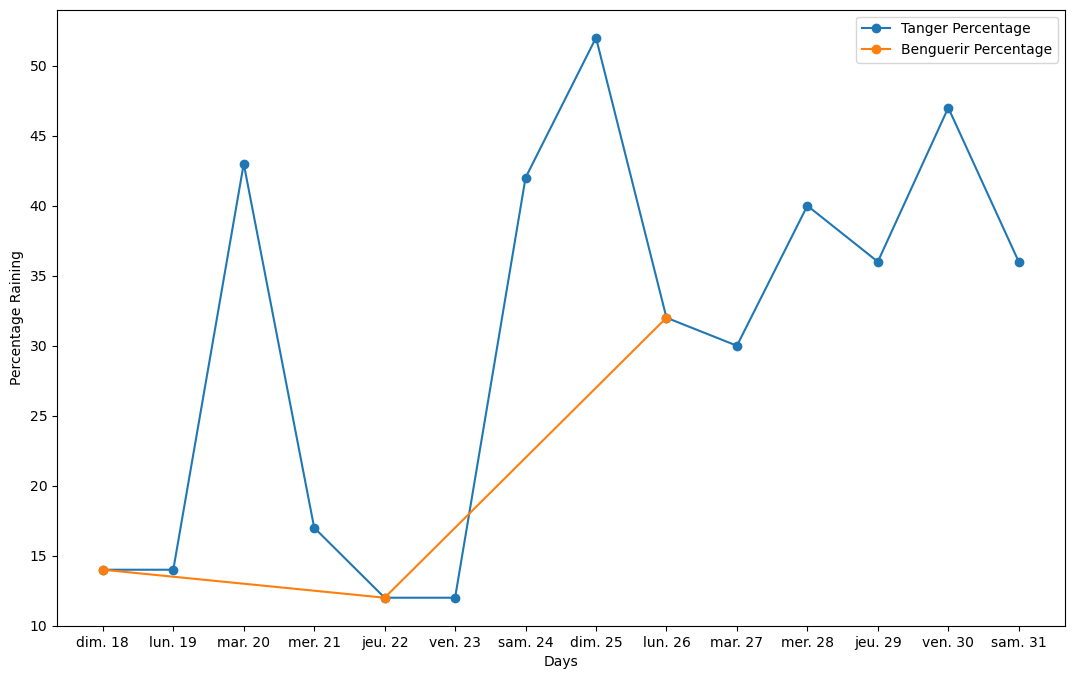

In [118]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (13,8))
Day_beng = Rainy_days_Benguerir['Day']
Day_tang = Rainy_days_tanger['Day']

plt.plot(Day_tang,Rainy_days_tanger["Rainning possibility (%)"],marker = 'o', label = "Tanger Percentage")
plt.plot(Day_beng,Rainy_days_Benguerir["Rainning possibility (%)"],marker = 'o', label = "Benguerir Percentage")
plt.legend()
plt.locator_params('x',nbins = 20)
plt.xlabel('Days')
plt.ylabel('Percentage Raining')
plt.show()

In [ ]:
#test